In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from msilib import Feature
import warnings
import itertools
import pmdarima as pm 
import statsmodels.api as sm
import datetime
from datetime import datetime

In [2]:
dataset12 = pd.read_csv("timvarden-2012-01-12.csv",index_col='Tid')
dataset13 = pd.read_csv("timvarden-2013-01-12.csv",index_col='Tid')
dataset14 = pd.read_csv("timvarden-2014-01-12.csv",index_col='Tid')
dataset15 = pd.read_csv("timvarden-2015-01-12.csv",index_col='Tid')
dataset16 = pd.read_csv("timvarden-2016-01-12.csv",index_col='Tid')
dataset17 = pd.read_csv("timvarden-2017-01-12.csv",index_col='Tid')
dataset18 = pd.read_csv("timvarden-2018-01-12.csv",index_col='Tid')
dataset19 = pd.read_csv("timvarden-2019-01-12.csv",index_col='Tid')
dataset20 = pd.read_csv("timvarden-2020-01-12.csv",index_col='Tid')
dataset21 = pd.read_csv("timvarden-2021-01-12.csv",index_col='Tid')
dataset = pd.concat([dataset12,dataset13,dataset14,dataset15,dataset16,dataset17,dataset18,dataset19,dataset20,dataset21],axis=0,)


In [3]:
dataset.replace('-',0,inplace=True)

In [4]:
dataset.shape

(87672, 24)

In [5]:
dataset.dtypes

SE1(Timmätt förbr exkl. avk.last)    float64
SE2(Timmätt förbr exkl. avk.last)    float64
SE3(Timmätt förbr exkl. avk.last)    float64
SE4(Timmätt förbr exkl. avk.last)    float64
SE1(Timmätta förluster)               object
SE2(Timmätta förluster)               object
SE3(Timmätta förluster)               object
SE4(Timmätta förluster)               object
SE1(Avkopplingsb.last)               float64
SE2(Avkopplingsb.last)               float64
SE3(Avkopplingsb.last)               float64
SE4(Avkopplingsb.last)               float64
SE1(Schablonleverans förbrukning)    float64
SE2(Schablonleverans förbrukning)    float64
SE3(Schablonleverans förbrukning)    float64
SE4(Schablonleverans förbrukning)    float64
SE1(Schablonleverans förluster)      float64
SE2(Schablonleverans förluster)      float64
SE3(Schablonleverans förluster)      float64
SE4(Schablonleverans förluster)      float64
SE1(Timmätt förbr >50 MW)            float64
SE2(Timmätt förbr >50 MW)            float64
SE3(Timmät

In [6]:
dataset = pd.DataFrame(dataset,dtype=np.float64)

In [7]:
dataset.fillna(0, inplace=True)

In [8]:
dataset.isna().sum()

SE1(Timmätt förbr exkl. avk.last)    0
SE2(Timmätt förbr exkl. avk.last)    0
SE3(Timmätt förbr exkl. avk.last)    0
SE4(Timmätt förbr exkl. avk.last)    0
SE1(Timmätta förluster)              0
SE2(Timmätta förluster)              0
SE3(Timmätta förluster)              0
SE4(Timmätta förluster)              0
SE1(Avkopplingsb.last)               0
SE2(Avkopplingsb.last)               0
SE3(Avkopplingsb.last)               0
SE4(Avkopplingsb.last)               0
SE1(Schablonleverans förbrukning)    0
SE2(Schablonleverans förbrukning)    0
SE3(Schablonleverans förbrukning)    0
SE4(Schablonleverans förbrukning)    0
SE1(Schablonleverans förluster)      0
SE2(Schablonleverans förluster)      0
SE3(Schablonleverans förluster)      0
SE4(Schablonleverans förluster)      0
SE1(Timmätt förbr >50 MW)            0
SE2(Timmätt förbr >50 MW)            0
SE3(Timmätt förbr >50 MW)            0
SE4(Timmätt förbr >50 MW)            0
dtype: int64

In [9]:
dataset.head(10)

,SE1(Timmätt förbr exkl. avk.last),SE2(Timmätt förbr exkl. avk.last),SE3(Timmätt förbr exkl. avk.last),SE4(Timmätt förbr exkl. avk.last),SE1(Timmätta förluster),SE2(Timmätta förluster),SE3(Timmätta förluster),SE4(Timmätta förluster),SE1(Avkopplingsb.last),SE2(Avkopplingsb.last),...,SE3(Schablonleverans förbrukning),SE4(Schablonleverans förbrukning),SE1(Schablonleverans förluster),SE2(Schablonleverans förluster),SE3(Schablonleverans förluster),SE4(Schablonleverans förluster),SE1(Timmätt förbr >50 MW),SE2(Timmätt förbr >50 MW),SE3(Timmätt förbr >50 MW),SE4(Timmätt förbr >50 MW)
Tid,,,,,,,,,,,,,,,,,,,,,
1.1.2012 0:00,-601.96,-1225.90,-4929.75,-1072.27,-94.28,-0.19,0.0,-0.02,-0.57,-4.05,...,-4639.28,-1472.19,-27.55,-59.90,-379.88,-106.59,0.0,0.0,0.0,0.0
1.1.2012 1:00,-603.20,-1226.87,-4954.92,-1072.46,-98.18,-0.22,0.0,-0.02,-0.57,-3.54,...,-4497.83,-1415.00,-26.63,-58.42,-368.23,-102.36,0.0,0.0,0.0,0.0
1.1.2012 2:00,-597.98,-1219.47,-4878.61,-1056.40,-99.58,-0.15,0.0,-0.03,-0.58,-3.55,...,-4360.19,-1360.18,-25.82,-56.91,-357.03,-98.38,0.0,0.0,0.0,0.0
1.1.2012 3:00,-597.31,-1214.62,-4854.91,-1049.81,-100.58,-0.25,0.0,-0.01,-0.58,-3.88,...,-4231.97,-1307.22,-25.23,-56.04,-346.74,-94.57,0.0,0.0,0.0,0.0
1.1.2012 4:00,-601.53,-1212.11,-4926.11,-1048.86,-101.08,-0.15,0.0,-0.01,-0.58,-3.83,...,-4156.86,-1273.30,-25.03,-55.47,-340.50,-92.09,0.0,0.0,0.0,0.0
1.1.2012 5:00,-589.11,-1219.80,-4929.36,-1055.25,-101.48,-0.12,0.0,-0.01,-0.57,-4.38,...,-4140.78,-1265.11,-25.13,-55.70,-339.17,-91.53,0.0,0.0,0.0,0.0
1.1.2012 6:00,-597.44,-1221.64,-5046.29,-1070.94,-100.17,-0.19,0.0,-0.01,-0.57,-7.25,...,-4158.28,-1276.71,-25.40,-56.03,-340.59,-92.39,0.0,0.0,0.0,0.0
1.1.2012 7:00,-605.20,-1235.52,-5086.23,-1107.23,-102.27,-0.18,0.0,-0.01,-0.56,-8.67,...,-4192.91,-1293.48,-25.77,-56.08,-343.59,-93.70,0.0,0.0,0.0,0.0
1.1.2012 8:00,-624.68,-1250.03,-5122.72,-1122.09,-101.77,-0.22,0.0,-0.01,-0.56,-7.20,...,-4218.59,-1315.58,-26.43,-56.58,-345.61,-95.27,0.0,0.0,0.0,0.0


In [10]:
dataset["SE3"] = dataset['SE3(Timmätt förbr exkl. avk.last)']+dataset['SE3(Timmätt förbr >50 MW)']+dataset['SE3(Avkopplingsb.last)']+dataset['SE3(Timmätta förluster)']+dataset['SE3(Schablonleverans förbrukning)']+dataset['SE3(Schablonleverans förluster)']

In [11]:
dataset = dataset*-1

In [12]:
df = dataset[['SE3']]

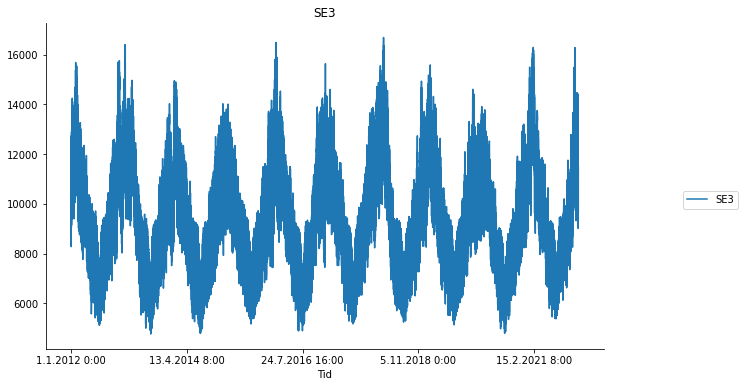

In [13]:
df.plot(figsize=(10,6))
plt.legend(bbox_to_anchor=(1.25,0.5))
plt.title("SE3")
sns.despine()

In [14]:
df.index = pd.to_datetime(df.index, utc=True)

In [15]:
#'M'groups the data in buckets by end of the month and 'MS' string groups the data in buckets by start of the month
df=df.resample('MS').mean()
print(df)

                                    SE3
Tid                                    
2012-01-01 00:00:00+00:00  10985.880215
2012-02-01 00:00:00+00:00  10762.807816
2012-03-01 00:00:00+00:00   9902.420497
2012-04-01 00:00:00+00:00   9619.181000
2012-05-01 00:00:00+00:00   8840.031102
...                                 ...
2021-08-01 00:00:00+00:00   8805.841102
2021-09-01 00:00:00+00:00   9192.234833
2021-10-01 00:00:00+00:00   9588.663629
2021-11-01 00:00:00+00:00  10663.568611
2021-12-01 00:00:00+00:00  11166.887204

[120 rows x 1 columns]


In [16]:
#Avbryt tidsindexet för att underlätta borttagningen av tidsstämplar
df = df.reset_index()

In [17]:
df["Tid"]= pd.to_datetime(df["Tid"].dt.date)

In [18]:
df = df.set_index('Tid')

df

Text(0, 0.5, 'SE3')

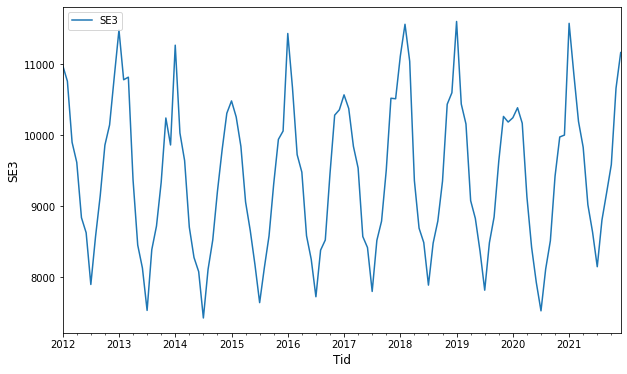

In [19]:
df.plot(figsize=(10,6))
plt.xlabel('Tid',fontsize=12)
plt.ylabel('SE3',fontsize=12)

In [20]:
#Test stationäritet
#ADF test
from statsmodels.tsa.stattools import adfuller

def TestStationaryAdfuller(df,cutoff=0.01):
    df_test=adfuller(df, autolag='AIC')
    df_test_output=pd.Series(df_test[0:4],index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    
    for key,value in df_test[4].items():
        df_test_output['Critical Value(%s)'%key]=value
    print(df_test_output)
    
    if df_test[1]<=cutoff:
        print('Reject the null hypothesis that the data has no unit root and the series is stationary')
    else:
        print('The null hypothesis cannot be rejected, that is, the data has a unit root and the data is a non-stationary sequence')

In [21]:
TestStationaryAdfuller(df)

Test Statistic                  -1.458093
p-value                          0.554131
#Lags Used                       9.000000
Number of Observations Used    110.000000
Critical Value(1%)              -3.491245
Critical Value(5%)              -2.888195
Critical Value(10%)             -2.580988
dtype: float64
The null hypothesis cannot be rejected, that is, the data has a unit root and the data is a non-stationary sequence


In [22]:
#Jämna ut original serie
from statsmodels.graphics.tsaplots import acf,pacf,plot_acf,plot_pacf
from statsmodels.graphics.api import qqplot

#Genomför 12 first-order differencing
df_diff=df-df.shift(1)
df_seasonal_diff=df_diff-df_diff.shift(12)


In [23]:
TestStationaryAdfuller(df_seasonal_diff.dropna(inplace=False))

Test Statistic                 -4.221536
p-value                         0.000606
#Lags Used                     13.000000
Number of Observations Used    93.000000
Critical Value(1%)             -3.502705
Critical Value(5%)             -2.893158
Critical Value(10%)            -2.583637
dtype: float64
Reject the null hypothesis that the data has no unit root and the series is stationary


In [24]:
#：Parameter Selection for the ARIMA Time Series Model
# Grid Research

# p、d、q range(0 - 2).
p = d = q = range(0, 2)

pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
a=[]
b=[]
c=[]
wf=pd.DataFrame()

warnings.filterwarnings('ignore') 

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(df,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMAX{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            a.append(param)
            b.append(param_seasonal)
            c.append(results.aic)
        except:
            continue
        
wf['pdq']=a
wf['seasonal_pdq']=b
wf['aic']=c
print(wf[wf['aic']==wf['aic'].min()])

SARIMAX(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2518.811953266537
SARIMAX(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2269.2043491000877
SARIMAX(0, 0, 0)x(0, 1, 0, 12)12 - AIC:1627.429808773754
SARIMAX(0, 0, 0)x(0, 1, 1, 12)12 - AIC:1391.1163911041413
SARIMAX(0, 0, 0)x(1, 0, 0, 12)12 - AIC:1644.6196307292398
SARIMAX(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1589.488863298512
SARIMAX(0, 0, 0)x(1, 1, 0, 12)12 - AIC:1433.134900018749
SARIMAX(0, 0, 0)x(1, 1, 1, 12)12 - AIC:1393.0360357741952
SARIMAX(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2414.664745752139
SARIMAX(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3643.4581104500453
SARIMAX(0, 0, 1)x(0, 1, 0, 12)12 - AIC:1598.9714771324038
SARIMAX(0, 0, 1)x(0, 1, 1, 12)12 - AIC:1359.683891237536
SARIMAX(0, 0, 1)x(1, 0, 0, 12)12 - AIC:1629.225352573988
SARIMAX(0, 0, 1)x(1, 0, 1, 12)12 - AIC:1554.8107473086873
SARIMAX(0, 0, 1)x(1, 1, 0, 12)12 - AIC:1411.733914248939
SARIMAX(0, 0, 1)x(1, 1, 1, 12)12 - AIC:1360.374184508277
SARIMAX(0, 1, 0)x(0, 0, 0, 12)12 - AIC:1873.7033236639343
SARIMAX(0, 1, 0)x(0, 0,

In [25]:
#Bäst parameterkombination：SARIMA(0, 1, 1)x(1, 1, 1, 12)12,  AIC:1325.076289 är minst
#Fitting an ARIMA Time Series Model

mod = sm.tsa.statespace.SARIMAX(df,
                                order=(0, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                SE3   No. Observations:                  120
Model:             SARIMAX(0, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -658.538
Date:                            Fri, 07 Oct 2022   AIC                           1325.076
Time:                                    15:38:25   BIC                           1335.207
Sample:                                01-01-2012   HQIC                          1329.167
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6891      0.062    -11.092      0.000      -0.811      -0.567
ar.S.L12      -0.2625      0.088   

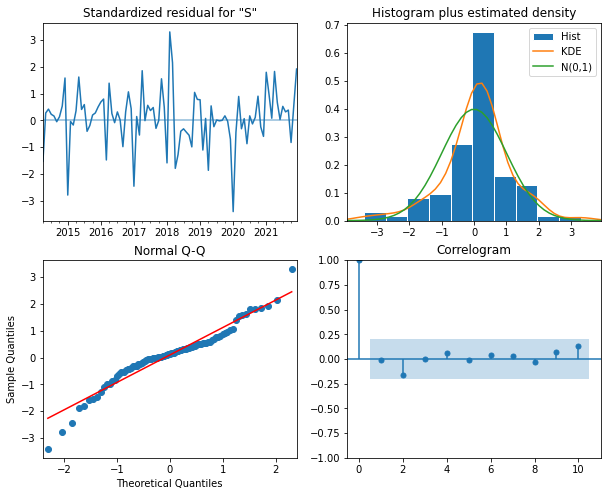

In [26]:
#Validation
results.plot_diagnostics(figsize=(10, 8))
plt.show()

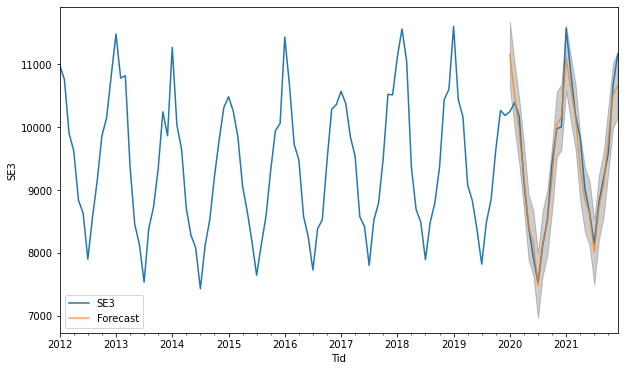

In [27]:
#Modell test

#"one-step ahead forecast"
pred = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = df['2012-01-01':].plot(label='Original',figsize=(10, 6))
pred.predicted_mean.plot(ax=ax, label='Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Tid')
ax.set_ylabel('SE3')
plt.legend()

plt.show()

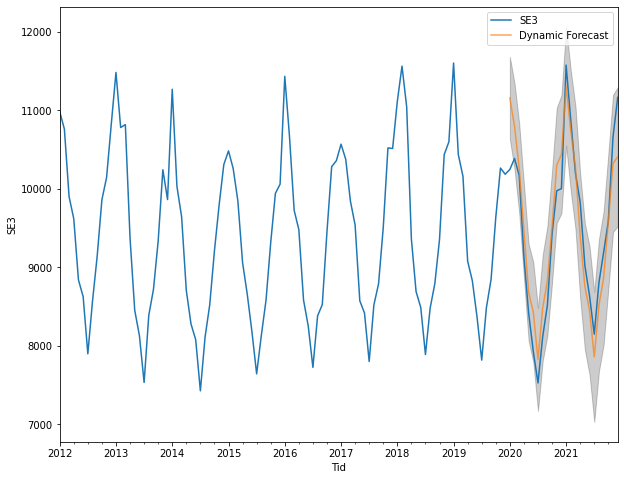

In [28]:
#"Dynamic forecast"

pred2 = results.get_prediction(start=pd.to_datetime('2020-01-01'), dynamic = True, full_results=True)
pred2_ci = pred2.conf_int()

ax = df['2012-01-01':].plot(label='Original',figsize=(10, 8))
pred2.predicted_mean.plot(ax=ax, label='Dynamic Forecast', alpha=.7)

ax.fill_between(pred2_ci.index,
                pred2_ci.iloc[:, 0],
                pred2_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Tid')
ax.set_ylabel('SE3')
plt.legend()

plt.show()

In [29]:
#Prediktera data för de kommande 3 åren
pred_fc = results.get_forecast(steps = 36)

# prediktera konfidensintervall
pred_ci = pred_fc.conf_int()

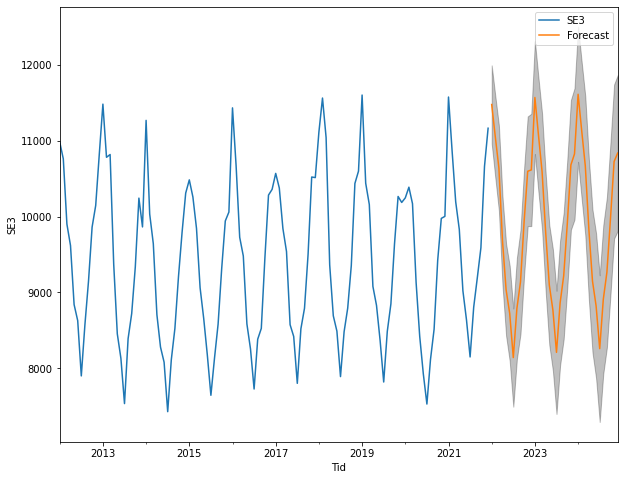

In [30]:
ax = df.plot(label='Original', figsize=(10, 8))
pred_fc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Tid')
ax.set_ylabel('SE3')

plt.legend()
plt.show()

In [31]:
#Data för de kommande 3 åren
pre_fc = pred_fc.predicted_mean
pre_fc

2022-01-01    11479.500070
2022-02-01    11054.416301
2022-03-01    10640.843616
2022-04-01     9680.883112
2022-05-01     9035.109896
2022-06-01     8723.445867
2022-07-01     8140.521177
2022-08-01     8789.884500
2022-09-01     9139.973916
2022-10-01     9929.246269
2022-11-01    10599.000219
2022-12-01    10616.653372
2023-01-01    11572.317158
2023-02-01    11072.335154
2023-03-01    10590.917617
2023-04-01     9787.212610
2023-05-01     9098.527600
2023-06-01     8767.457441
2023-07-01     8209.585542
2023-08-01     8860.929838
2023-09-01     9220.550498
2023-10-01     9906.686684
2023-11-01    10682.807974
2023-12-01    10827.966519
2024-01-01    11614.805322
2024-02-01    11134.486914
2024-03-01    10670.881195
2024-04-01     9826.153260
2024-05-01     9148.734205
2024-06-01     8822.758884
2024-07-01     8258.309687
2024-08-01     8909.133903
2024-09-01     9266.252254
2024-10-01     9979.465552
2024-11-01    10727.661426
2024-12-01    10839.345024
Freq: MS, Name: predicted_me